# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings. simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

# Data Collection

## Import Boston Data

Content
The following describes the dataset columns:

Detail info : <br>
https://www.kaggle.com/datasets/avish5787/boston-data-set <br>

CRIM - per capita crime rate by town <br>
ZN - proportion of residential land zoned for lots over 25,000 sq.ft. <br>
INDUS - proportion of non-retail business acres per town. <br>
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise) <br>
NOX - nitric oxides concentration (parts per 10 million) <br>
RM - average number of rooms per dwelling <br>
AGE - proportion of owner-occupied units built prior to 1940 <br>
DIS - weighted distances to five Boston employment centres <br>
RAD - index of accessibility to radial highways <br>
TAX - full-value property-tax rate per $10,000 <br>
PTRATIO - pupil-teacher ratio by town <br>
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town <br>
LSTAT - percent lower status of the population <br>
MEDV - Median value of owner-occupied homes in USD1000's <br>

In [2]:
boston_df = pd.read_csv("../00_general_data/housing_boston.csv", delimiter=';')

In [3]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.090,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,49.671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,49.671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,60.622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,60.622,3.0,222.0,18.7,396.90,5.33,36.2


# Data Preprocessing

In [4]:
# check for shape of dataset
# we get 506 rows and 14 columns
print("Shape of dataset: {}".format(boston_df.shape))

Shape of dataset: (506, 14)


In [5]:
# check for null values
# perfect, no null values
boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [6]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [7]:
# check for descriptive statistics
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,131.695678,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,33.836573,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,246.395746,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,22.912317,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.137000,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,17.930000,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,27.533000,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,143.337000,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,47.648250,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,996.654000,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,121.265000,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
# check for columns
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [9]:
# check for numbers of columns
len(boston_df.columns)

14

# Exploratory Data Analysis

## Create Pair Plot

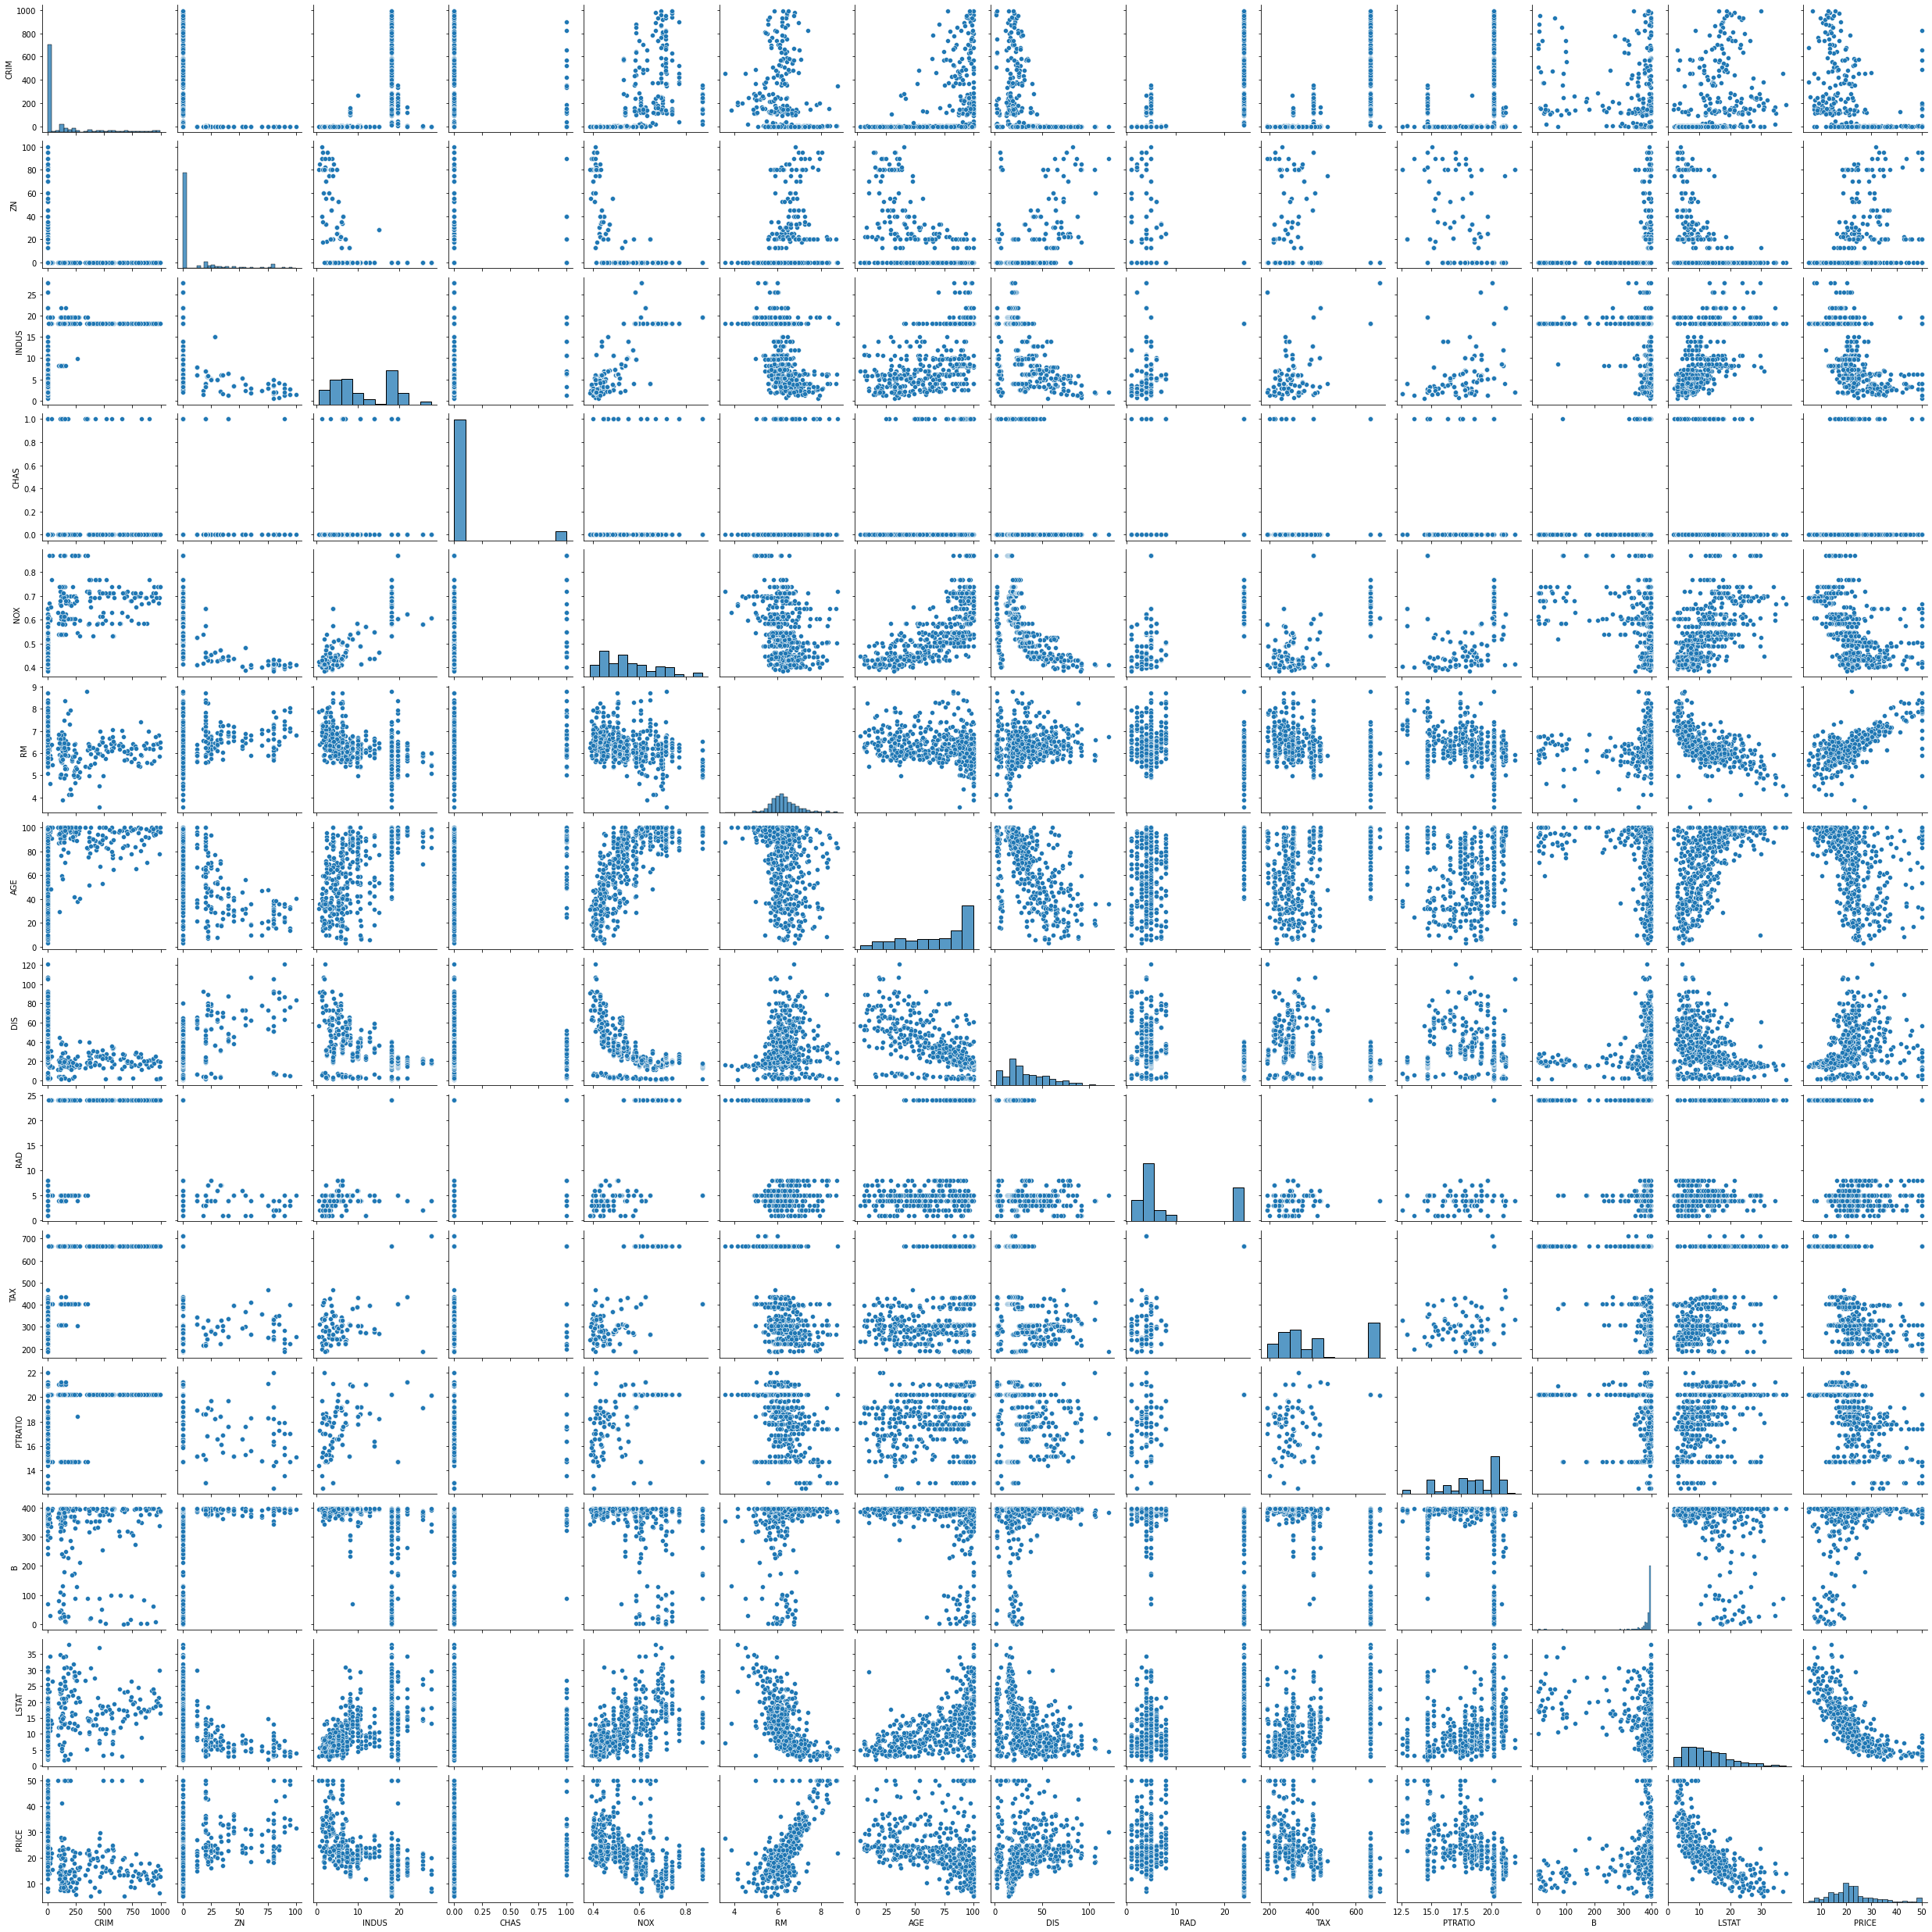

In [10]:
# create pairplot for independent and dependent variable
sns.pairplot(boston_df)

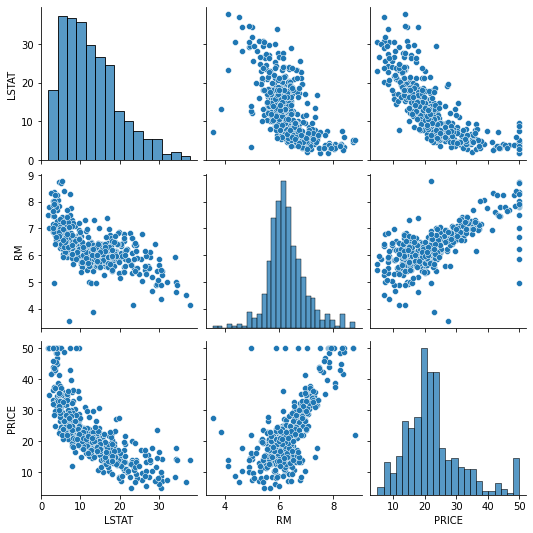

In [11]:
# Create pairplot for selection of independent variable
sns.pairplot(boston_df[['LSTAT', 'RM', 'PRICE']])

## Heat Map

<AxesSubplot:>

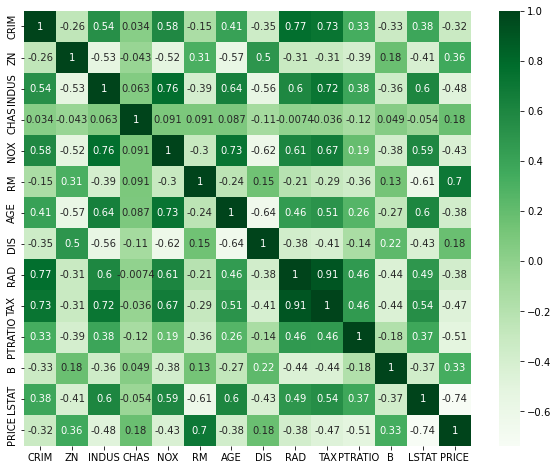

In [12]:
# check for heatmap
# let's see for the correlation coeficient
plt.figure(figsize = (10,8))
sns.heatmap(boston_df.corr(), annot=True, cmap='Greens')

## Visualize Null Values

<AxesSubplot:>

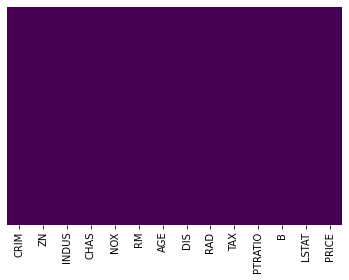

In [13]:
# No null values right
sns.heatmap(boston_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<AxesSubplot:>

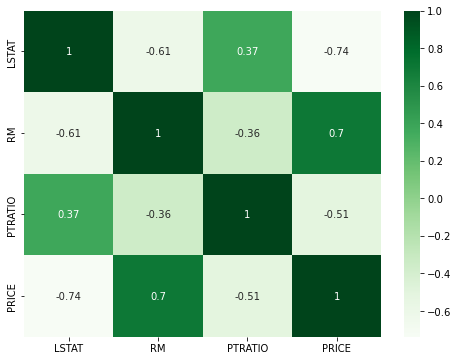

In [14]:
# Only select some of the independent variables that have correlation with Price
plt.figure(figsize = (8,6))
sns.heatmap(boston_df[['LSTAT', 'RM', 'PTRATIO', 'PRICE']].corr(), annot=True, cmap='Greens')

# Train a Linear Regression Model

## Split between Dependent and Independent Variables

In [15]:
X = boston_df[['LSTAT', 'RM', 'PTRATIO']]
y = boston_df['PRICE']

# Train and Test Split

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
# use test size 20% from total data
# pseudo random number generator with code 101

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Create and Train the Model

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lm = LinearRegression()

In [20]:
lm.fit(X_train, y_train)

LinearRegression()

# Model Evaluation

In [21]:
print(lm.intercept_)

16.0504061823262


In [22]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
LSTAT,-0.565558
RM,4.693523
PTRATIO,-0.869067


# Predictions from Model

In [23]:
X_test.head()

,LSTAT,RM,PTRATIO
195,2.97,7.875,14.4
4,5.33,7.147,18.7
434,15.17,6.208,20.2
458,16.23,6.301,20.2
39,4.32,6.595,18.3


## Train Accuracy

In [24]:
train_score = lm.score(X_train, y_train)*100

In [25]:
print("Training Accuracy: {}".format(train_score))

Training Accuracy: 68.83021074789582


## Test Accuracy

In [26]:
test_score = lm.score(X_test, y_test)*100

In [27]:
print("Test Accuracy: {}".format(test_score))

Test Accuracy: 64.7705737459886


## Predict X_test

In [28]:
y_pred = lm.predict(X_test)

In [29]:
y_pred

array([38.81763549, 30.32904783, 19.05313909, 18.89014525, 28.65706329,
       30.10259852, 39.2611043 , 10.05485949, 33.26634806,  8.97016067,
       28.93953975, 13.05846423, 16.79649841, 23.35748208, 24.02423456,
       17.9563216 ,  8.32324385, 29.683283  , 27.74083876, 25.05722235,
       11.96574993, 21.59583641, 21.64535668, 30.10765627, 30.90024578,
       19.80920743, 27.94454328, 19.10630547, 21.04755579, 35.49686109,
       22.93876358, 18.30032195, 35.4588844 , 39.63072178, 29.30830954,
       21.38769812, 18.8669342 , 18.92420531,  7.1110388 , 28.1722449 ,
       22.41185975, 21.64153801, 35.09151751, 12.00146772, 17.53392756,
       25.63357026, 30.58279165, 16.05585592, 26.52124306, 28.6758152 ,
       32.78850246, 36.71259358, 22.68857459, 19.79808372, 32.02478697,
       -3.55717631, 19.44876334, 14.7250045 , 18.07516285, 17.45200799,
       32.24782966,  1.72213754, 11.1821255 , 22.16137954, 12.37431504,
       24.13268958, 23.54529455, 21.11453891, 17.29240853, 19.16

# Check Scatter Plot between y_test and y_pred

# Scatter Plot using Matplotlib

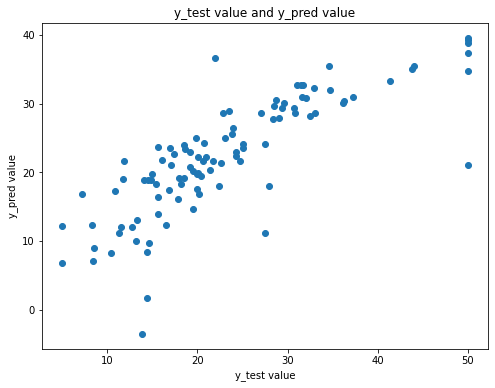

In [30]:
plt.figure(figsize=(8,6))
plt.xlabel('y_test value')
plt.ylabel('y_pred value')
plt.title('y_test value and y_pred value')

plt.scatter(x=y_test, y=y_pred)

## Scatter Plot and Regression Plot Using Seaborn

<AxesSubplot:title={'center':'y_test value and y_pred value'}, xlabel='PRICE', ylabel='y_pred value'>

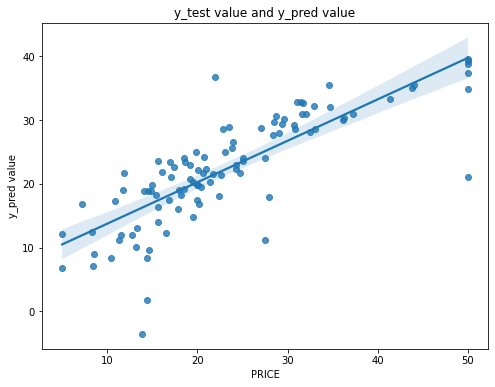

In [31]:
plt.figure(figsize=(8,6))
plt.xlabel('y_test value')
plt.ylabel('y_pred value')
plt.title('y_test value and y_pred value')
sns.regplot(x=y_test, y=y_pred)

# Residual Histogram

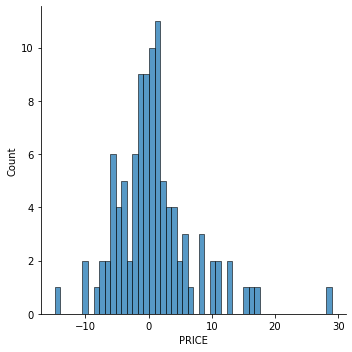

In [32]:
sns.displot((y_test-y_pred), bins=50, height = 5)

# Regression Evaluation Metrics

In [33]:
from sklearn import metrics

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [34]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 4.293031599041227
MSE: 39.524314889112866
RMSE: 6.286836636108248


In [35]:
mod = sm.OLS(y , X).fit()

In [36]:
print(mod.summary())

                                 OLS Regression Results                                
Dep. Variable:                  PRICE   R-squared (uncentered):                   0.952
Model:                            OLS   Adj. R-squared (uncentered):              0.952
Method:                 Least Squares   F-statistic:                              3335.
Date:                Fri, 25 Nov 2022   Prob (F-statistic):                        0.00
Time:                        20:38:06   Log-Likelihood:                         -1564.1
No. Observations:                 506   AIC:                                      3134.
Df Residuals:                     503   BIC:                                      3147.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

references :

https://www.accelebrate.com/blog/interpreting-results-from-linear-regression-is-the-data-appropriate

https://www.statsmodels.org/dev/examples/notebooks/generated/ols.html

https://medium.com/analytics-vidhya/boston-house-price-prediction-using-machine-learning-ad3750a866cd

https://medium.com/analytics-vidhya/ordinary-least-squared-ols-regression-90942a2fdad5